# <font color='red'> Getting insights from IPL dataset</font>

### Solving the problem :- Number of matches won by each team in IPL histroy


In [26]:
#Importing the Required Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the data

ball = pd.read_excel("Ball_by_Ball.xlsx")
match = pd.read_excel("Match.xlsx")
player = pd.read_excel('Player.xlsx')
player_match = pd.read_excel('Player_Match.xlsx')
season = pd.read_excel('Season.xlsx') 
team = pd.read_excel('Team.xlsx')

In [3]:
ball.head(5)

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,


In [4]:
match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [5]:
###How many times each team has won in IPL(2008 - 2016)?
##value_counts - [1-13] 1 -? 2 -? 3- ?


In [6]:
#matches happened in Each Venue
match['Venue_Name'].value_counts()

M Chinnaswamy Stadium                                   58
Eden Gardens                                            54
Feroz Shah Kotla                                        53
Wankhede Stadium                                        49
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               41
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       11
Himachal Pradesh Cricket Association Stadium             9
New Wanderers Stadium                                   

In [7]:
# Match Winners based on their ID
match['Match_Winner_Id'].value_counts()

7.0     80
3.0     79
2.0     70
1.0     68
4.0     63
5.0     63
6.0     56
11.0    34
8.0     29
10.0    12
13.0     9
9.0      6
12.0     5
Name: Match_Winner_Id, dtype: int64

### To get the Team ID lets merge the two Dataframes "team" and "match"


In [8]:
team_match = pd.merge(team,match,left_on = 'Team_Id',right_on='Match_Winner_Id')
team_match.head()

,Team_Id,Team_Name,Team_Short_Code,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,...,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,1,Kolkata Knight Riders,KKR,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,...,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,1,Kolkata Knight Riders,KKR,335991,2008-04-20,1,8,1,Eden Gardens,8,...,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
2,1,Kolkata Knight Riders,KKR,336015,2008-05-08,1,2,1,Eden Gardens,1,...,1,0,by runs,5.0,1.0,1.0,470,475,Kolkata,India
3,1,Kolkata Knight Riders,KKR,336019,2008-05-11,8,1,1,"Rajiv Gandhi International Stadium, Uppal",1,...,1,0,by runs,23.0,1.0,1.0,475,492,Hyderabad,India
4,1,Kolkata Knight Riders,KKR,336022,2008-05-13,1,6,1,Eden Gardens,1,...,1,0,by runs,23.0,1.0,144.0,470,475,Kolkata,India


In [9]:
x=pd.DataFrame(team_match.groupby("Team_Name")["Match_Winner_Id"].count())
x.sort_values("Match_Winner_Id",ascending=False)

,Match_Winner_Id
Team_Name,
Mumbai Indians,80
Chennai Super Kings,79
Royal Challengers Bangalore,70
Kolkata Knight Riders,68
Kings XI Punjab,63
Rajasthan Royals,63
Delhi Daredevils,56
Sunrisers Hyderabad,34
Deccan Chargers,29


In [10]:
winner_by_id=pd.crosstab(index=team_match["Match_Winner_Id"],columns="Won").reset_index()
winner_by_id

col_0,Match_Winner_Id,Won
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


In [11]:
won=pd.merge(winner_by_id,team,how="inner",left_on="Match_Winner_Id",right_on="Team_Id")
won=won[["Team_Name","Won"]]
won
won[["Team_Name","Won"]].sort_values("Won",ascending=False)

,Team_Name,Won
6,Mumbai Indians,80
2,Chennai Super Kings,79
1,Royal Challengers Bangalore,70
0,Kolkata Knight Riders,68
3,Kings XI Punjab,63
4,Rajasthan Royals,63
5,Delhi Daredevils,56
10,Sunrisers Hyderabad,34
7,Deccan Chargers,29
9,Pune Warriors,12


In [12]:
# Home matches played using the groupby
team_match.groupby("Team_Name_Id")["Team_Name"].count().reset_index()

,Team_Name_Id,Team_Name
0,1,62
1,2,76
2,3,74
3,4,65
4,5,52
5,6,68
6,7,62
7,8,39
8,9,7
9,10,23


In [13]:
Home_Matches=pd.crosstab(index=team_match["Team_Name_Id"],columns="Home_Count").reset_index()
Home_Matches

col_0,Team_Name_Id,Home_Count
0,1,62
1,2,76
2,3,74
3,4,65
4,5,52
5,6,68
6,7,62
7,8,39
8,9,7
9,10,23


In [14]:
Away_Matches=pd.crosstab(team_match["Opponent_Team_Id"],columns="Away_Count").reset_index()
Away_Matches

col_0,Opponent_Team_Id,Away_Count
0,1,70
1,2,61
2,3,57
3,4,69
4,5,65
5,6,63
6,7,78
7,8,36
8,9,7
9,10,22


In [15]:
Total_Matches=pd.merge(Home_Matches,Away_Matches,how="inner",right_on="Opponent_Team_Id",left_on="Team_Name_Id")

In [16]:
Total_Matches=Total_Matches[["Team_Name_Id","Home_Count","Away_Count"]]
Total_Matches

col_0,Team_Name_Id,Home_Count,Away_Count
0,1,62,70
1,2,76,61
2,3,74,57
3,4,65,69
4,5,52,65
5,6,68,63
6,7,62,78
7,8,39,36
8,9,7,7
9,10,23,22


In [17]:
#Adding a column to sum up the total matches
Total_Matches["Total"]=Total_Matches["Home_Count"]+Total_Matches["Away_Count"]

In [18]:
Total_Matches=pd.merge(Total_Matches[["Team_Name_Id","Total"]],winner_by_id,how="inner",left_on="Team_Name_Id",right_on="Match_Winner_Id")

In [19]:
Total_Matches.drop("Match_Winner_Id",axis=1,inplace=True)
Total_Matches

col_0,Team_Name_Id,Total,Won
0,1,132,68
1,2,137,70
2,3,131,79
3,4,134,63
4,5,117,63
5,6,131,56
6,7,140,80
7,8,75,29
8,9,14,6
9,10,45,12


In [20]:
Total_Matches=pd.merge(Total_Matches,team,how="inner",left_on="Team_Name_Id",right_on="Team_Id")

In [21]:
Total_Matches=Total_Matches[["Team_Short_Code","Total","Won"]]

In [22]:
Total_Matches

,Team_Short_Code,Total,Won
0,KKR,132,68
1,RCB,137,70
2,CSK,131,79
3,KXIP,134,63
4,RR,117,63
5,DD,131,56
6,MI,140,80
7,DC,75,29
8,KTK,14,6
9,PW,45,12


In [23]:
# Winning percentage of each Team
Total_Matches["Win_Percentage"]=Total_Matches["Won"]/Total_Matches["Total"]*100

In [24]:
Total_Matches.sort_values("Win_Percentage",ascending=False)

,Team_Short_Code,Total,Won,Win_Percentage
2,CSK,131,79,60.305344
6,MI,140,80,57.142857
12,GL,16,9,56.250000
10,SRH,62,34,54.838710
4,RR,117,63,53.846154
0,KKR,132,68,51.515152
1,RCB,137,70,51.094891
3,KXIP,134,63,47.014925
8,KTK,14,6,42.857143
5,DD,131,56,42.748092


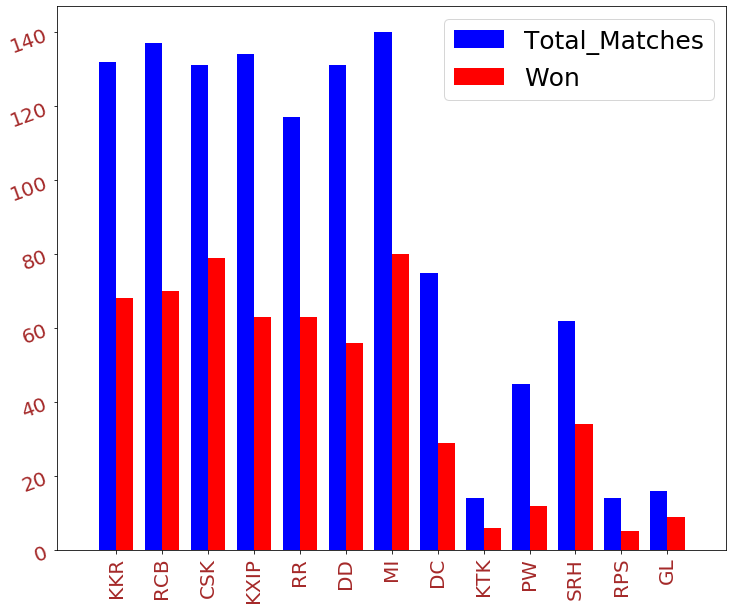

In [27]:
#Plotting the bar graph
plt.figure(figsize=(12,10))
plt.bar(np.array(range(1,14)),height=Total_Matches["Total"],width=0.5,label="Total_Matches",color="b") #label is used fpr legend
plt.bar(np.array(range(1,14))+0.5,height=Total_Matches["Won"],width=0.5,label="Won",color="r")
plt.bar((np.array(range(0,14))+.75),height=140,width=0.25,color="white") # Used to get a gap between two team bars

plt.xticks((np.arange(1,14)+0.25),Total_Matches["Team_Short_Code"],rotation=90,color="brown",size=20)
plt.yticks(c="brown",size=20,rotation=20)

plt.legend(loc="best",fontsize=25)
#plt.xscale("linear")#plotting the width of bar by some varying scaling like log, linear, etc.

plt.show()

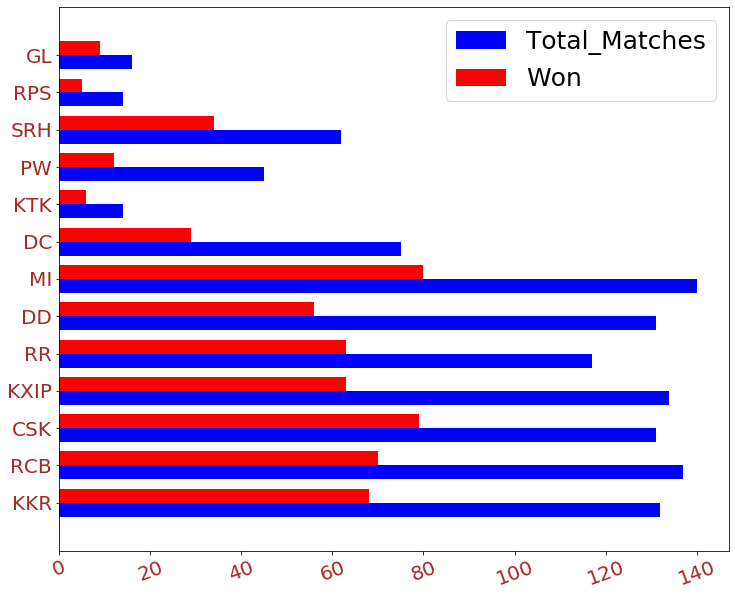

In [28]:
#Plotting the Horizontal-bar graph
plt.figure(figsize=(12,10))
plt.barh(np.array(range(1,14)),width=Total_Matches["Total"],height=0.5,label="Total_Matches",color="b") #label is used fpr legend
plt.barh(np.array(range(1,14))+0.5,width=Total_Matches["Won"],height=0.5,label="Won",color="r")
plt.barh((np.array(range(0,14))+.75),width=140,height=0.25,color="white") # Used to get a gap between two team bars

plt.yticks((np.arange(1,14)+0.25),Total_Matches["Team_Short_Code"],rotation=0,color="brown",size=20)
plt.xticks(c="brown",size=20,rotation=20)

plt.legend(loc="best",fontsize=25)
#plt.xscale("linear")#plotting the width of bar by some varying scaling like log, linear, etc.

plt.show()

<font color="blue"> Lets say we want to check the what teams are deciding after winning the toss? </font>

In [29]:

Toss_decision = match.groupby(['Toss_Decision']).size().reset_index()

Toss_decision.columns=['Toss_Decision', "Number of Matches"]

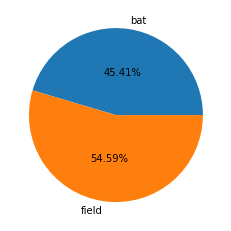

In [30]:
# To represent the same by a pie chart we import "matplotlib"
import matplotlib.pyplot as plt

# Use of autopct to indicate percent lables on pie chart

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%',pctdistance=0.5)
plt.show()


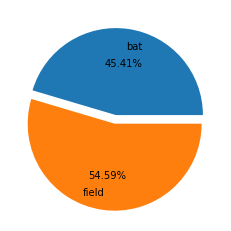

In [31]:
# Using the functions like labeldistance and explode
plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', explode=(0, 0.1),labeldistance=0.8)
plt.show()

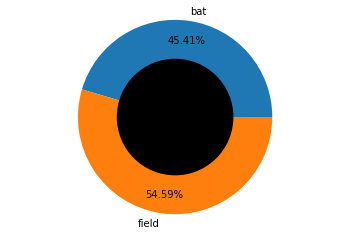

In [32]:
# Creating a donut chart from this pie
# by just change pie chart to donut chart by drawing a circle with black color at origin.
# i.e, drawing a circle centered at (0,0)

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', pctdistance = 0.8)

centre_circle = plt.Circle((0,0),0.60,fc='black')

##gcf - get current figure
##gca - get current axis
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

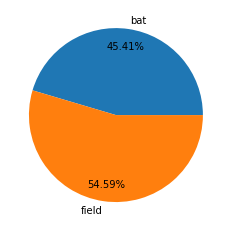

In [33]:
plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', pctdistance = 0.8)

centre_circle = plt.Circle((0,0),0.60,fc='white')

<font color="blue"> Baatsmen Scored on centuries </font>

In [34]:
# Solution to Top 3 batsman based on centuries

Centuries_table = ball.groupby(['Match_Id', 'Striker_Id'])['Batsman_Scored'].sum().reset_index()

# Creating the column of century

Centuries_table['Century'] = Centuries_table['Batsman_Scored'].apply(lambda x: 'Cent' if x > 99 else 'No')

# You can also use numpy where function

# Centuries_table['Century'] = np.where(Centuries_table['Batsman_Scored']>99, "Cent", "No")

Centuries_table

# Now lets filter the rows which contain Cent

Cent_table = Centuries_table[(Centuries_table['Century'] == "Cent")]

# Cross table on Striker ID to get the count of centuries for each player

Final_Table = pd.crosstab(index=Cent_table['Striker_Id'], columns='No. of Centuries').reset_index()

Final_Table.sort_values(by = 'No. of Centuries', ascending = False).head(3)

col_0,Striker_Id,No. of Centuries
19,162,5
1,8,4
16,110,3


In [35]:
centuries=pd.merge(Final_Table,player,how="inner",left_on="Striker_Id",right_on="Player_Id")

In [36]:
centuries=centuries[["Player_Id","Player_Name","No. of Centuries"]]
centuries.sort_values("No. of Centuries",ascending=False,inplace=True)
centuries

,Player_Id,Player_Name,No. of Centuries
19,162,CH Gayle,5
1,8,V Kohli,4
16,110,AB de Villiers,3
0,2,BB McCullum,2
5,32,SR Watson,2
6,41,V Sehwag,2
22,187,DA Warner,2
8,53,AC Gilchrist,2
21,185,M Vijay,2
25,355,Q de Kock,1


<font color="blue"> Highest No of Sixes </font>

In [37]:
ball.head(5)

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,


In [38]:
six_scored=pd.DataFrame(ball[ball["Batsman_Scored"]==6].groupby("Striker_Id")["Batsman_Scored"].count())

In [39]:
pd.crosstab(index=ball["Striker_Id"],columns=ball["Batsman_Scored"]==6)

Batsman_Scored,False,True
Striker_Id,,
1,1284,42
2,1848,106
3,127,2
4,1041,60
5,82,2
...,...,...
430,1,0
431,70,8
432,1,0


In [40]:
six=pd.merge(six_scored,player,how="inner",left_on="Striker_Id",right_on="Player_Id")
six=six[["Player_Id","Player_Name","Batsman_Scored"]]
six[six["Batsman_Scored"]>100].sort_values("Batsman_Scored",ascending=False)

,Player_Id,Player_Name,Batsman_Scored
121,162,CH Gayle,252
51,57,RG Sharma,164
18,21,SK Raina,161
7,8,V Kohli,148
28,31,YK Pathan,143
94,110,AB de Villiers,142
17,20,MS Dhoni,140
135,187,DA Warner,134
24,27,Yuvraj Singh,133
157,221,KA Pollard,125
